# Evaluation of the german used car market applying data science

In this notebook, a deeper look on the german used car market is applied, using the "Used cars database" from Kaggle, supplied by Orges Leka in 2016. The dataset contains over 370.000 used car adds from ebay-kleinanzeigen. For the analysis and modelling, CRISP-DM is applied. The dataset is available here:  https://www.kaggle.com/orgesleka/used-cars-database

## Step 1: Business Understanding

Germany is a car-nation. Not only it is home to several of the worlds largest car manufacturers, like BMW, Mercedes-Benz and VW, there is also a huge number of car owners. According to the Kraftfahrt-Bundesamt, the german authority responsible for cars, in the beginning of 2019 64,8 million cars and trailers with an average age of 9.5 years were registered (https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/bestand_node.html). A huge market like this also has a big market for used cars. In the following, this market is being analyzed and several questions shall be answered:

1. What are the most common vehicle types?
2. Which brands are predominant on the german used cars market? Are there differences in average price?
3. What is the average age of cars on the german used cars market?
4. Are there local differences in brands and prices?
5. What is the distribution of motorizations? Which fuel-systems are preferred? What is the average motor-power?
6. What is the distribution of sale prizes?
7. What is a common mileage for used cars?
8. Can a car value be predicted by using features from the add?

## Step 2: Data Understanding

In the following, the required libraries as well as the data is being imported, and some basic statistics about the data are examined.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Plot data
import matplotlib.pyplot as plt

In [2]:
# Read in data from csv files downloaded from https://www.kaggle.com/orgesleka/used-cars-database and save to dataframe
df_autos = pd.read_csv('autos.csv', encoding='latin8')

In [3]:
# Print data about data
print('Exact number of entries/rows in df_autos: {}'.format(df_autos.shape[0]))
print('Number of features/columns in df_autos: {}'.format(df_autos.shape[1]))
print('Feature/Column-names in df_autos: {}'.format(df_autos.columns.values))

Exact number of entries/rows in df_autos: 371528
Number of features/columns in df_autos: 20
Feature/Column-names in df_autos: ['dateCrawled' 'name' 'seller' 'offerType' 'price' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'kilometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']


In [4]:
# Basic statistics about the numeral values:
df_autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
# Have a first look at the data:
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


What already can be noticed is that there are several NaN values in the data, as well as columns, which might contain data, that is not very useful in the following. Lateron, I will deal with the NaN-values. Also it seems that certain columns might be less useful than others or might not have any use at all. Let's check that by evaluating the distinct values and their counts of certain columns:

In [6]:
# Check column values for relevance and drop irrelevant columns
print(np.unique(df_autos['offerType'],return_counts=True))
print(np.unique(df_autos['abtest'],return_counts=True))
print(np.unique(df_autos['nrOfPictures'],return_counts=True))
print(np.unique(df_autos['seller'],return_counts=True))

(array(['Angebot', 'Gesuch'], dtype=object), array([371516,     12], dtype=int64))
(array(['control', 'test'], dtype=object), array([178943, 192585], dtype=int64))
(array([0], dtype=int64), array([371528], dtype=int64))
(array(['gewerblich', 'privat'], dtype=object), array([     3, 371525], dtype=int64))


- 'offerType' contains the values 'Angebot' and 'Gesuch', which translates to 'Offer' and 'Requested'. As there are only 12 Requests, those colum as well as the requests themselves are dropped.
- 'abtest': No importance on the analysis. Drop.
- 'nrOfPictures' will be dropped, as there are 0-entries only
- 'seller' contains only 3 'gewerblich' (commercial sellers) only, the rest are private sellers. Column will be dropped.
- 'dateCrawled': No importance on the analysis. Drop.
- 'monthOfRegistration': To keep things easy, we will focus on the year only. Drop.
- 'dateCreated': No importance on the analysis. Drop.
- 'lastSeen': No importance on the analysis. Drop.
- 'name': This column might contain useful information, yet the effort to use it is a lot higher than for the other features, as it is free text. To keep things simple, it is dropped.

In [7]:
# Having a more detailed look on the NaNs by columns:
df_autos.isnull().sum(axis = 0)

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

So there is a big number of NaN-values, especially with notRepairedDamage or vehicleType. I will have to deal with that when it comes to preparing for the modelling to predict prizes. For the other questions, it is less of a problem, the NaN-values will be dropped separately for every analysis.

'yearOfRegistration' does not have any missing values, but it seems like there are some values contained, that obviously don't make sense:

(array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1911, 1915, 1919, 1920, 1923, 1925,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800,
       2900, 3000, 3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000,
       5300, 5555, 5600, 5900, 5911, 6000, 6200, 6500, 7000, 7100, 7500,
       7777, 7800, 8000, 8200, 8455, 8500, 8888, 9

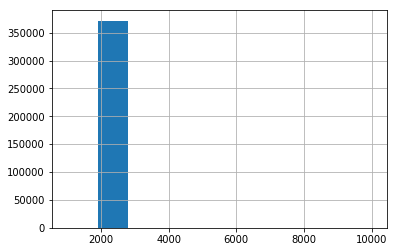

In [8]:
# Show registration years with counts and plot histogram
print(np.unique(df_autos['yearOfRegistration'],return_counts=True))
df_autos['yearOfRegistration'].hist()

In [9]:
# As the first car was built in 1885, check every year separately to manually inspect whether the entries make sense or not.
for year in range(1885, 1950):
    print('Year: {}'.format(year))
    print(df_autos[df_autos['yearOfRegistration'] == year].name.values)

Year: 1885
[]
Year: 1886
[]
Year: 1887
[]
Year: 1888
[]
Year: 1889
[]
Year: 1890
[]
Year: 1891
[]
Year: 1892
[]
Year: 1893
[]
Year: 1894
[]
Year: 1895
[]
Year: 1896
[]
Year: 1897
[]
Year: 1898
[]
Year: 1899
[]
Year: 1900
[]
Year: 1901
[]
Year: 1902
[]
Year: 1903
[]
Year: 1904
[]
Year: 1905
[]
Year: 1906
[]
Year: 1907
[]
Year: 1908
[]
Year: 1909
[]
Year: 1910
['KA_Lufthansa_Edition_450\x80_VB' 'Bellier_Vario'
 'Opel_100_Jahre__Kunstdrucke'
 'Tausche/Verkaufe_S51_gegen_Audi_ab_150ps_oder_1.9tdi'
 'Suche_VW_mit_Diesel__54_PS' 'SUCHE_Golf_1_1_8t_G60_2_0_16V_ab_150_Ps'
 'VW_Passat_Kombi_H_Kennzeichen' 'vw_polo_86c'
 'Suche_guenstiges_Auto_mit_TÜV'
 'Zeugen_gesucht_in_22869_Schenefeld_!!!!!!!!!!!!!!!!'
 'Fiat_Punto_ohne_Motor_und_Getriebe'
 'Caddy_14d__Schlachten_oder_Herichten.' 'VW_T1_Karosse_ohne_motor'
 'Algila_mit_motorschaden'
 'Suche_Fahrzeug_mit_Anhaengerkupplung_und_LPG_Gas_bis_1000\x80'
 'E30_3.20_suche_bitte_melden' 'Vw_Beetle_1_9_Tdi'
 'Sommerreifen_175/70_R14_auf_Felgen' 'Tueren

It looks like everything offer that has year <=1910 is clearly not a real car offer with correct data. Those columns are dropped lateron. The same applies to entries with year > 2016, those are also obviously incorrect, as the dataset originates form 2016. So only rows with 1910 < year <2017 are kept, the rest is dropped.

In [10]:
# Check data types of all columns:
for col in df_autos.columns:
    print(col + ': ' + str(type(df_autos[col].values[0])))

dateCrawled: <class 'str'>
name: <class 'str'>
seller: <class 'str'>
offerType: <class 'str'>
price: <class 'numpy.int64'>
abtest: <class 'str'>
vehicleType: <class 'float'>
yearOfRegistration: <class 'numpy.int64'>
gearbox: <class 'str'>
powerPS: <class 'numpy.int64'>
model: <class 'str'>
kilometer: <class 'numpy.int64'>
monthOfRegistration: <class 'numpy.int64'>
fuelType: <class 'str'>
brand: <class 'str'>
notRepairedDamage: <class 'float'>
dateCreated: <class 'str'>
nrOfPictures: <class 'numpy.int64'>
postalCode: <class 'numpy.int64'>
lastSeen: <class 'str'>


The data types look fine, for the general analysis no further work is needed. It will be needed though for the prediction task.

## Step 3: Data Preparation

By using the insights gathered above, the data is being prepared for further analysis.

### General Data Preparation for all Questions

In [11]:
# Drop rows that are requests and keep offers. Check whether 12 rows are removed.
print(df_autos.shape[0])
df_autos = df_autos[df_autos.offerType != 'Gesuch']
print(df_autos.shape[0])

371528
371516


In [12]:
# Drop all pf the above named columns. Check number of columns.
print(df_autos.shape[1])
remove_cols = ['offerType', 'abtest', 'nrOfPictures', 'seller', 'dateCrawled',
               'monthOfRegistration', 'dateCreated', 'lastSeen', 'name']
df_autos = df_autos.drop(columns=remove_cols)
print(df_autos.shape[1])

20
11


In [13]:
# Drop rows with years that do not make sense.
print(len(df_autos))
df_autos = df_autos[df_autos['yearOfRegistration'] > 1910]
df_autos = df_autos[df_autos['yearOfRegistration'] < 2017]
print(len(df_autos))

371516
356664


In [14]:
# Display data again:
df_autos.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,70435
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,90480
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437


As I want to make an analysis on local features, only the ZIP-Code as in 'postalCode' is not sufficient. By using a dataset on german Zip-Codes with, I will add more detailed information on the locations. The dataset PLZ.tab used here is available on: http://opengeodb.org/wiki/PLZ.tab

In [15]:
# Load in dataset
df_zips = pd.read_csv('PLZ.tab', encoding='ISO-8859-1', sep='\t')
df_zips.head()

,#loc_id,plz,lon,lat,Ort
0,5078,1067,13.721068,51.060034,Dresden
1,5079,1069,13.738907,51.039559,Dresden
2,5080,1097,13.743967,51.066745,Dresden
3,5081,1099,13.828980,51.092619,Dresden
4,153646,1108,13.828980,51.092619,Dresden


In [16]:
# Drop the unneeded column #loc_id
df_zips = df_zips.drop(columns='#loc_id')
# Merge with the auto-dataset on 'postalCode' and 'plz' and create a new DataFrame from it
df_autos_locs = pd.merge(df_autos, df_zips, left_on='postalCode', right_on='plz')
df_autos_locs = df_autos_locs.drop(columns='plz')
df_autos_locs.rename(columns={'Ort': 'city'})
df_autos_locs.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,lon,lat,Ort
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,70435,9.159157,48.830653,Stuttgart
1,250,kleinwagen,1999,manuell,60,fiesta,150000,benzin,ford,ja,70435,9.159157,48.830653,Stuttgart
2,2500,kleinwagen,2004,manuell,54,panda,80000,benzin,fiat,nein,70435,9.159157,48.830653,Stuttgart
3,1800,kleinwagen,2001,manuell,125,corsa,150000,benzin,opel,nein,70435,9.159157,48.830653,Stuttgart
4,18300,suv,2007,automatik,426,grand,100000,benzin,jeep,nein,70435,9.159157,48.830653,Stuttgart


In [26]:
df_autos_locs.shape

(356473, 14)

The number of rows decreased some, from 356664 rows before merging to 356473 afterwards. As there are no explicit NaN-values in the Zip-Codes, it is most likely that this is due to ZIP-Codes, that could not be matched. I assume that those are erratic or non-existing ZIP-codes. As that number is quite low anyways, that is fine.

### Specific Data Preparation to predict prizes

In [18]:
# Placeholder
#
#
#
#
#
#
#
#

## Step 4: Modeling

In this section, the analysis itself will be executed. First I will deal with the analytical questions and afterwards the prize-prediction will be implemented.

### Function definitions for later usage

In [19]:
# Define function to count the unique values of a dataframe and return in a sorted fashion. Also drop NaNs before.
def count_col_vals(df, col):
    # Drop NaNs and return number of dropped rows and remaining rows
    len_before = len(df)
    df = df.dropna(subset=[col])
    print('Dropped {} NaN-Rows for column {}.'.format(len_before - len(df), col))
    print('Number of remaining rows is {}.'.format(len(df)))
    # Sort and count
    data_labels, data_counts = np.unique(df[col],return_counts=True)
    d = {'labels': data_labels, 'counts': data_counts}
    df_result = pd.DataFrame(data=d).sort_values(by='counts').reset_index(drop=True)
    df_result['percentage'] = df_result['counts'] / sum(df_result['counts'])
    # Print in descending order and return df
    print()
    print(df_result.iloc[::-1])
    return df_result

In [20]:
# Define function to plot barchart from dataframe
def plot_barchart(data_labels, data_counts, y_label, chart_title, height=10):
    y_pos = np.arange(len(data_labels))
    plt.figure(figsize=(20,height))
    plt.barh(y_pos, data_counts, align='center', alpha=1)    
    plt.yticks(y_pos, data_labels)
    plt.xlabel('Count')
    plt.ylabel(y_label)
    plt.title(chart_title)    
    plt.show()

### Q1: What are the most common vehicle types?

In [21]:
df_types_results = count_col_vals(df_autos, 'vehicleType')

Dropped 23058 NaN-Rows for column vehicleType.
Number of remaining rows is 333606.

       labels  counts  percentage
7   limousine   95886    0.287423
6  kleinwagen   80008    0.239828
5       kombi   67558    0.202508
4         bus   30194    0.090508
3      cabrio   22896    0.068632
2       coupe   19011    0.056986
1         suv   14703    0.044073
0      andere    3350    0.010042


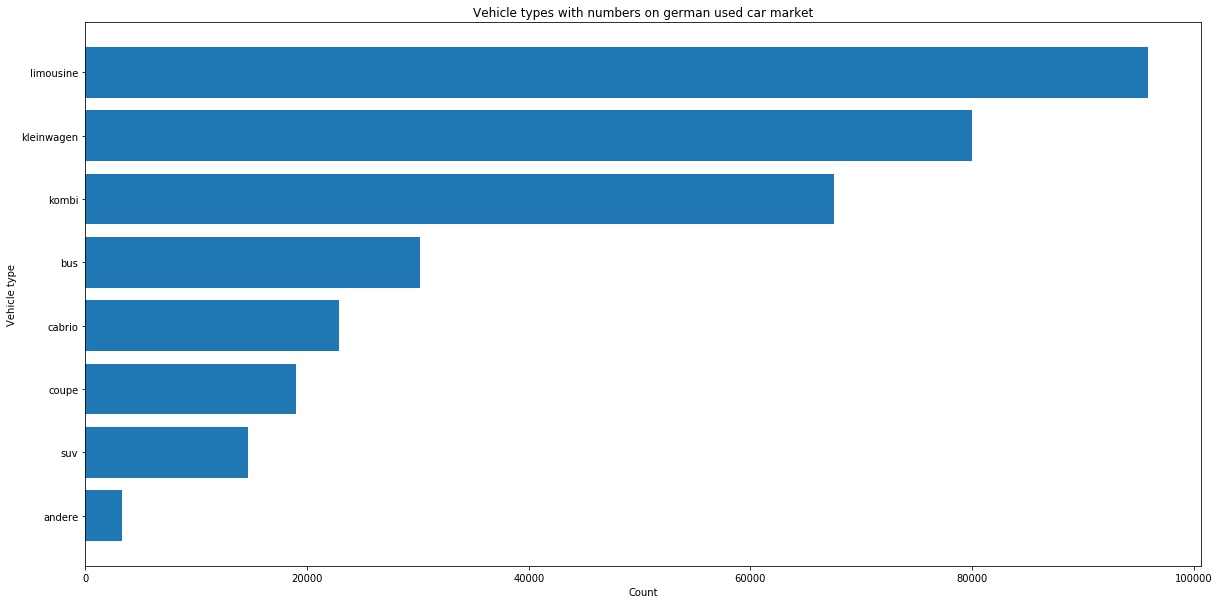

In [22]:
#Plot barchart
plot_title = 'Vehicle types with numbers on german used car market'
plot_barchart(df_types_results.labels, df_types_results.counts, 'Vehicle type', plot_title)

### Q2: Which brands are predominant on the german used cars market? Are there differences in average price?

Dropped 0 NaN-Rows for column brand.
Number of remaining rows is 356664.

            labels  counts  percentage
39      volkswagen   75754    0.212396
38             bmw   39131    0.109714
37            opel   38191    0.107078
36   mercedes_benz   34232    0.095978
35            audi   31873    0.089364
34            ford   24557    0.068852
33         renault   16964    0.047563
32         peugeot   10652    0.029866
31            fiat    9187    0.025758
30            seat    6647    0.018637
29           skoda    5497    0.015412
28           mazda    5476    0.015353
27           smart    5032    0.014109
26         citroen    4949    0.013876
25          nissan    4841    0.013573
24          toyota    4547    0.012749
23  sonstige_autos    3761    0.010545
22         hyundai    3505    0.009827
21            mini    3286    0.009213
20           volvo    3257    0.009132
19      mitsubishi    2948    0.008265
18           honda    2707    0.007590
17             kia    2454   

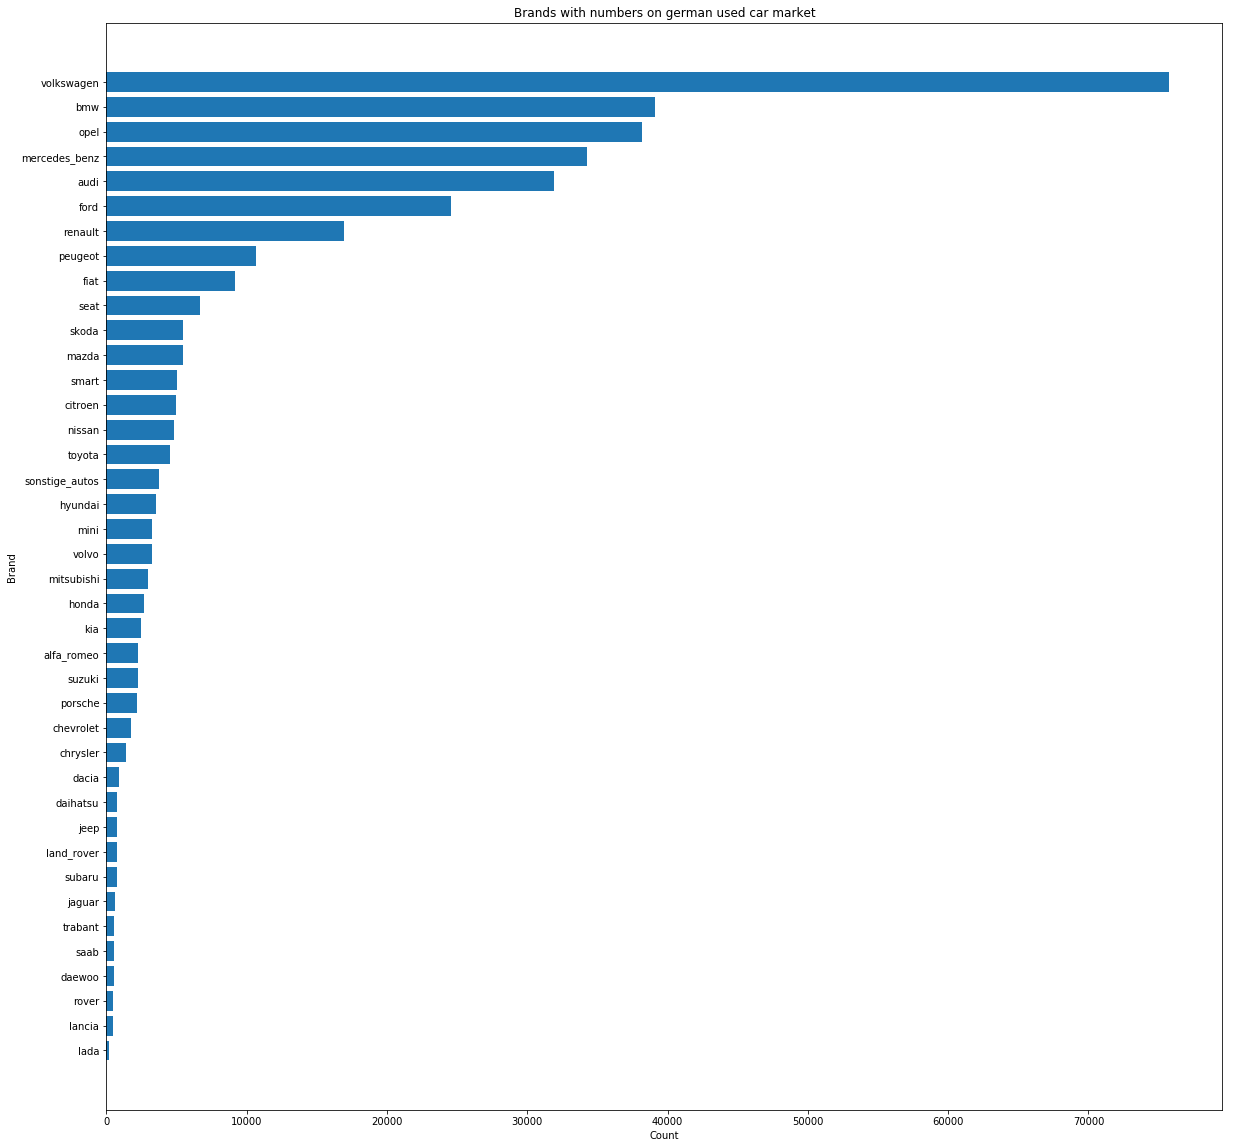

In [23]:
df_brands_results = count_col_vals(df_autos, 'brand')
plot_title = 'Brands with numbers on german used car market'
plot_barchart(df_brands_results.labels, df_brands_results.counts, 'Brand', plot_title, 20)

### Q3: What is the average age of cars on the german used cars market?

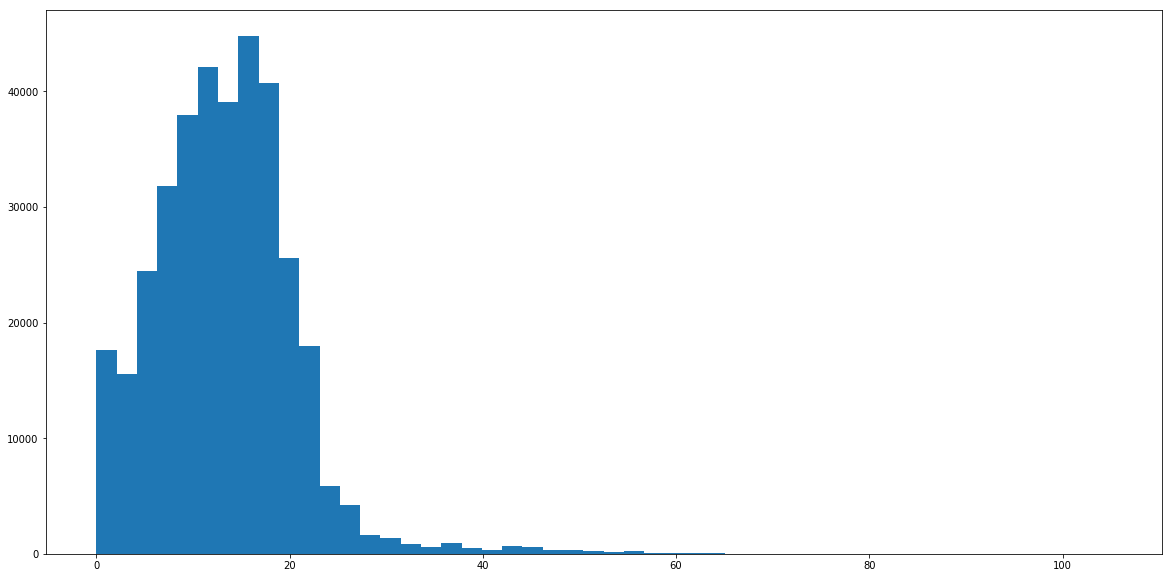

In [44]:
# Create age column and plot age-histrogram
df_autos['age'] = 2016 - df_autos['yearOfRegistration']
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos['age'], bins=50, histtype='bar')

The definitition for an "Oldtimer"-car varies, but commonly it is defined as cars with an age of more than 30 years. So display a histogram of non-Oldtimer cats only.

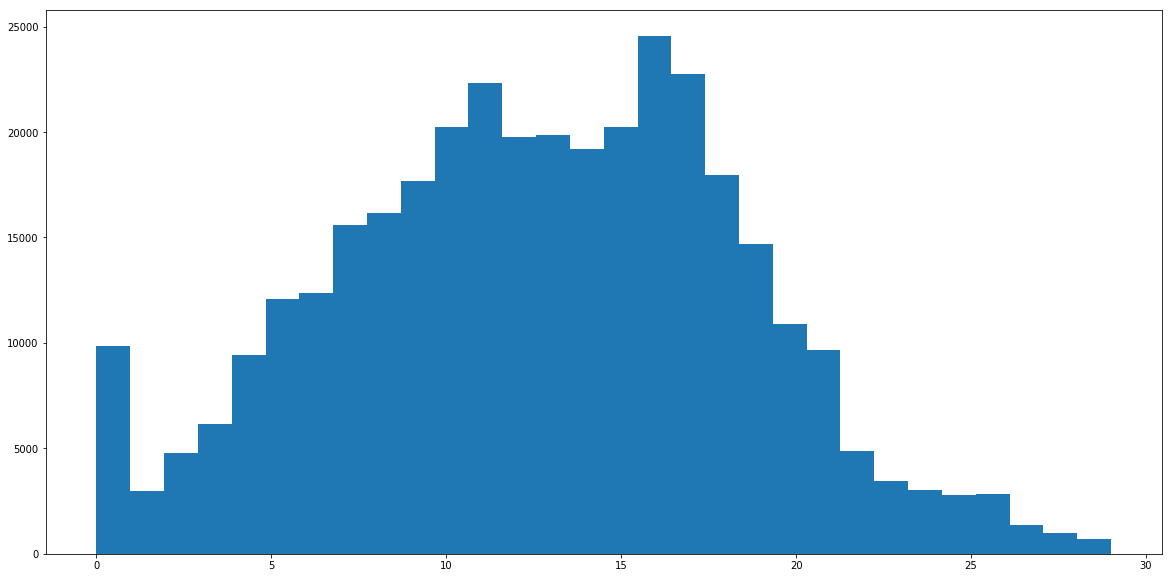

In [49]:
# Display non-Oldtimer cars only
n_years = 30
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos[df_autos['age'] < n_years].age, bins=n_years, histtype='bar')

In [56]:
# Display descriptive statistics on the yearOfRegistration and age
print(df_autos['yearOfRegistration'].describe())
print()
print(df_autos['age'].describe())

count    356664.000000
mean       2002.806972
std           7.225029
min        1911.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: yearOfRegistration, dtype: float64

count    356664.000000
mean         13.193028
std           7.225029
min           0.000000
25%           8.000000
50%          13.000000
75%          17.000000
max         105.000000
Name: age, dtype: float64
